# Titanic DataSet

In [43]:
import pandas as pd
import seaborn as sns

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
PassengerId = train["PassengerId"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
fulldata = [test,train]

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


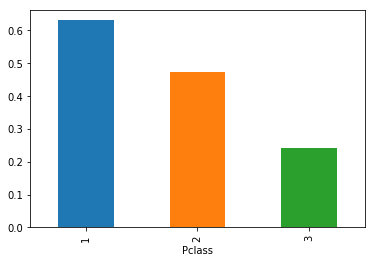

In [76]:
a = train.groupby("Pclass")["Survived"].mean()
a.plot(kind = "bar");
a.to_frame().T

Sex,female,male
Survived,0.742038,0.188908


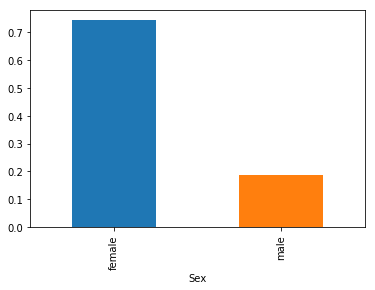

In [78]:
a = train.groupby("Sex")["Survived"].mean()
a.plot(kind = "bar");
a.to_frame().T

In [82]:
for i in fulldata:
    i["FamilySize"] = i['SibSp'] + i['Parch'] + 1

FamilySize,1,2,3,4,5,6,7,8,11
Survived,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


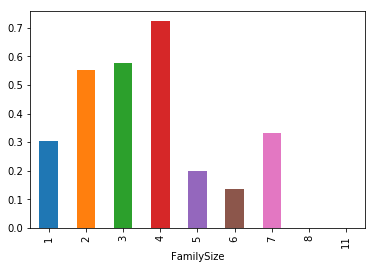

In [90]:
a = train.groupby("FamilySize")["Survived"].mean()
a.plot(kind = "bar");
a.to_frame().T

In [94]:
for i in fulldata:
    i["IsAlone"] = 0
    i.loc[i['FamilySize'] == 1, 'IsAlone'] = 1

IsAlone,Not alone,Alone
Survived,0.50565,0.303538


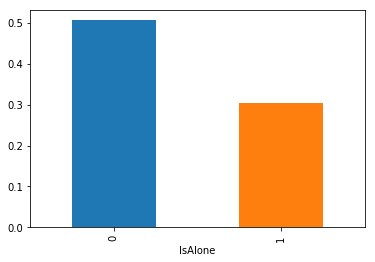

In [99]:
a = train.groupby("IsAlone")["Survived"].mean()
a.plot(kind = "bar");
a.to_frame().T.rename(columns = {0 : "Not alone",1 : "Alone"})

In [100]:
for i in fulldata:
    i['Embarked'] = i['Embarked'].fillna('S')

Embarked,Cherbourg,Queenstown,Southampton
Survived,0.553571,0.38961,0.339009


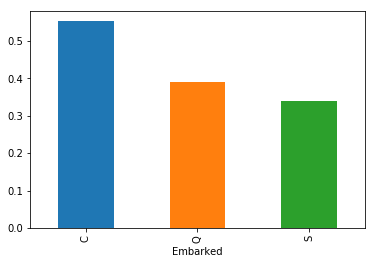

In [108]:
a = train.groupby("Embarked")["Survived"].mean()
a.plot(kind = "bar");
a.to_frame().T.rename(columns = {"C" : "Cherbourg","Q" : "Queenstown","S" : "Southampton"})